In [41]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [42]:
path = os.chdir(r"/Users/cts08/Desktop")
os.listdir()
#데이터 불러오기
df1 = pd.read_csv("data_038_1.csv", header = 0 )
df2 = pd.read_excel("schema.xlsx")
df1.head()
temp_dat = df1.copy()

temp_dat['숙박'] = 0
temp_dat['식료품'] = 0
temp_dat['의류및신발'] = 0
temp_dat['요금'] = 0
temp_dat['가정용품및가사서비스'] = 0
temp_dat['보건'] =0
temp_dat['교통'] =0
temp_dat['통신'] =0
temp_dat['오락및문화'] =0
temp_dat['교육'] =0
temp_dat['기타'] =0
temp_dat['쇼핑몰기타'] =0
temp_dat['사치품'] =0


for i in range(1, 168):
    if (i >= 1 and i <= 5):
        temp_dat['숙박'] += temp_dat[f"B{i}"]
    elif(i == 15 or i == 17 or i == 20 or (i<= 27 and i >= 22) or (i<= 31 and i >= 29) or (i<= 42 and i >= 35) ):
        temp_dat['식료품'] += temp_dat[f"B{i}"]
    elif ((i <= 66 and i >= 63) or (i <= 71 and i >= 68)):
        temp_dat['의류및신발'] += temp_dat[f"B{i}"]
    elif (i == 157  or (i <= 78 and i >= 72)):
        temp_dat['사치품'] += temp_dat[f"B{i}"]
    elif((i<= 14 and i >= 13) or i == 16 or (i<= 19 and i >= 18) or i == 21  ):
        temp_dat['쇼핑몰기타'] += temp_dat[f"B{i}"]
    elif(i == 12 or (i<= 164 and i >= 161) ):
        temp_dat['요금'] += temp_dat[f"B{i}"]
    elif(i == 34 or (i<= 60 and i >= 43) or i == 67 or i == 93 or (i<= 112 and i >= 109) or (i<= 117 and i >= 114)  ):
        temp_dat['가정용품및가사서비스'] += temp_dat[f"B{i}"]
    elif((i<= 107 and i >= 106) or (i<= 149 and i >= 139) ):
        temp_dat['보건'] += temp_dat[f"B{i}"]
    elif((i <= 11 and i >= 7) or i == 118):
        temp_dat['교통'] += temp_dat[f"B{i}"]
    elif(i <= 62 and i >= 61):
        temp_dat['통신'] += temp_dat[f"B{i}"]
    elif(i == 6 or (i <= 90 and i >= 79) or (i <= 105 and i >= 97) or (i <= 121 and i >= 120) or i== 123 or i ==134 or (i <= 138 and i >= 137) ):
        temp_dat['오락및문화'] += temp_dat[f"B{i}"]
    elif((i <= 92 and i >= 91) or i == 94 or i == 108 or i == 122 or (i <= 156 and i >= 155) or i == 160):
        temp_dat['교육'] += temp_dat[f"B{i}"]
    else:
        temp_dat['기타'] += temp_dat[f"B{i}"]


In [43]:
temp_dat

,P1,P2,P3,P4,P5,P6,P7,B1,B2,B3,...,요금,가정용품및가사서비스,보건,교통,통신,오락및문화,교육,기타,쇼핑몰기타,사치품
0,M,20대_후,1,1,0,0,A은행,0,0,0,...,146000,842000,31000,496000,283000,0,0,4545000,102000,0
1,M,50대_후,1,0,0,0,A은행,0,0,0,...,0,6000,0,0,0,0,0,727000,0,0
2,M,40대_후,1,1,0,0,A은행,0,0,0,...,129000,300000,260000,1000,107000,13000,523000,1959000,0,0
3,F,60대_초,1,1,0,0,A은행,0,0,0,...,42985000,0,0,0,0,2000,0,43000000,0,0
4,M,30대_후,0,1,0,0,B은행,0,0,0,...,35000,3947000,6000,0,923000,0,0,4910000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473223,F,40대_초,0,1,0,1,B은행,0,0,0,...,0,52000,50000,0,150000,0,0,964000,0,0
473224,M,20대_후,1,1,0,0,A은행,0,0,0,...,0,54000,82000,156000,136000,0,0,4907000,48000,0
473225,F,40대_후,1,1,1,0,B은행,0,0,0,...,148000,529000,0,37000,32000,25000,6000,1790000,1000,0
473226,M,60대_후,1,1,1,0,A은행,0,0,0,...,14000,175000,0,0,220000,0,0,1824000,36000,0


In [49]:
a_dat = temp_dat.groupby(['P1','P2']).mean().iloc[:,-10:]
a_mean = a_dat.round(decimals=0)
a_mean.columns.name = "성별 및 연령"
a_mean

성별 및 연령         요금  가정용품및가사서비스        보건       교통       통신    오락및문화        교육  \
P1 P2                                                                           
F  20대_초   31996.0    262818.0   80873.0  45901.0  53174.0  48550.0    9867.0   
   20대_후   56743.0    304229.0  103572.0  43179.0  54813.0  45061.0   11629.0   
   30대_초   64304.0    319238.0  156558.0  34353.0  54641.0  38981.0   26977.0   
   30대_후  127982.0    327311.0  190624.0  23317.0  57934.0  37359.0   85088.0   
   40대_초  190198.0    309596.0  245992.0  19354.0  62103.0  37753.0  109359.0   
   40대_후  207905.0    247863.0  248010.0  18320.0  63664.0  41937.0   92625.0   
   50대_초  253907.0    196709.0  267585.0  18128.0  59961.0  41384.0   35556.0   
   50대_후  212750.0    145268.0  323209.0  13538.0  48815.0  40757.0   10257.0   
   60대_초  232262.0    116649.0  293607.0  12611.0  39368.0  38923.0    6205.0   
   60대_후  238095.0     94189.0  336607.0  10436.0  32228.0  32991.0    7016.0   
M  20대_초   83119.0    218135.0   67748.0  31890.0  57128.0  51873.0   10160.0   
   20대_후  104669.0    243926.0   91132.0  34586.0  66553.0  52659.0    6817.0   
   30대_초  146165.0    264336.0  162913.0  30806.0  65848.0  48513.0    9882.0   
   30대_후  248388.0    276975.0  247435.0  23421.0  66974.0  50452.0   33778.0   
   40대_초  401032.0    243934.0  274551.0  21101.0  68613.0  56972.0   63639.0   
   40대_후  457418.0    199838.0  279354.0  18809.0  67846.0  64250.0   78275.0   
   50대_초  565643.0    155617.0  260676.0  20527.0  62392.0  71167.0   48536.0   
   50대_후  586972.0    126143.0  308854.0  19831.0  51051.0  66071.0   14407.0   
   60대_초  635205.0    102305.0  323538.0  16876.0  38234.0  55076.0    5671.0   
   60대_후  614597.0     75314.0  277364.0  16117.0  28540.0  44884.0    3568.0   

성별 및 연령          기타    쇼핑몰기타     사치품  
P1 P2                                 
F  20대_초  1510706.0  67572.0  5895.0  
   20대_후  1765222.0  84106.0  4652.0  
   30대_초  2019232.0  94381.0  4868.0  
   30대_후  2399930.0  95156.0  4495.0  
   40대_초  2646242.0  87090.0  4549.0  
   40대_후  2523381.0  71665.0  3493.0  
   50대_초  2407756.0  65870.0  5144.0  
   50대_후  2275741.0  62767.0  6197.0  
   60대_초  2144736.0  56411.0  5092.0  
   60대_후  2008986.0  50043.0  5483.0  
M  20대_초  1511892.0  41164.0  2009.0  
   20대_후  1870063.0  54191.0  3783.0  
   30대_초  2151549.0  63570.0  4149.0  
   30대_후  2544946.0  69134.0  3911.0  
   40대_초  2782149.0  60023.0  5669.0  
   40대_후  2797634.0  50942.0  3846.0  
   50대_초  2797624.0  42680.0  3176.0  
   50대_후  2649222.0  34234.0  3201.0  
   60대_초  2518519.0  30863.0  3495.0  
   60대_후  2152592.0  25824.0  4529.0

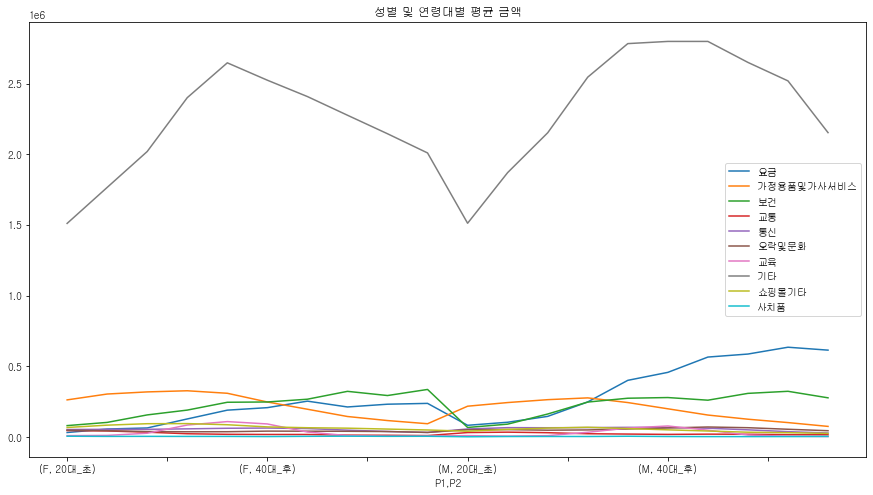

In [48]:
a_mean.plot(figsize = (15,8))
plt.title("성별 및 연령대별 평균 금액")
plt.show()

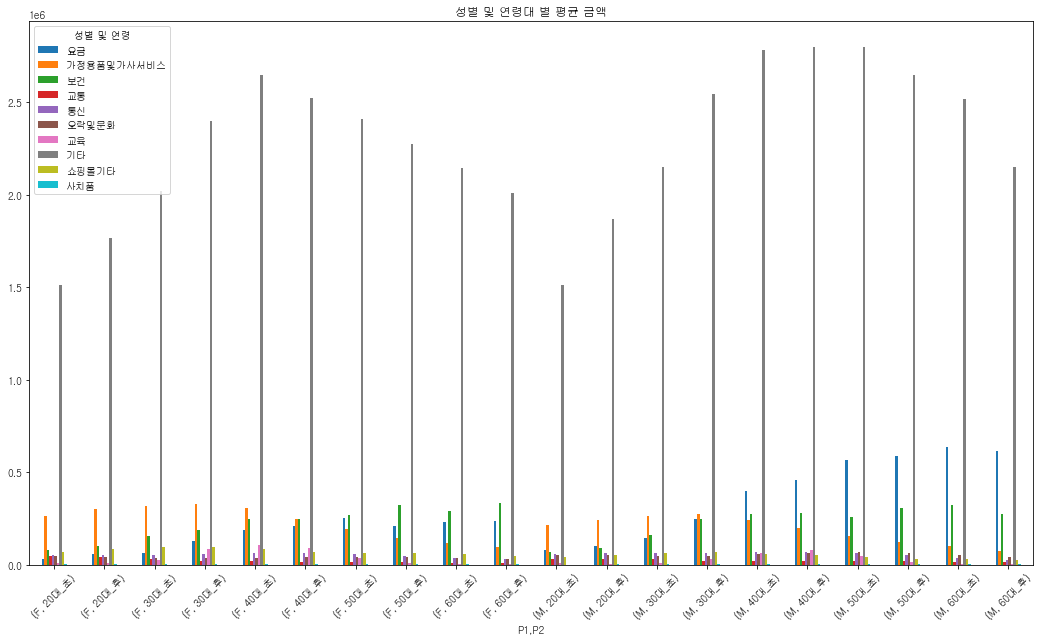

In [55]:
a_mean.plot.bar(rot=0, figsize = (18,10))
plt.title("성별 및 연령대 별 평균 금액")
plt.xticks(rotation=45)
plt.show()

In [58]:
a1_mean = a_mean.drop(["기타"], axis = "columns")
a1_mean

성별 및 연령         요금  가정용품및가사서비스        보건       교통       통신    오락및문화        교육  \
P1 P2                                                                           
F  20대_초   31996.0    262818.0   80873.0  45901.0  53174.0  48550.0    9867.0   
   20대_후   56743.0    304229.0  103572.0  43179.0  54813.0  45061.0   11629.0   
   30대_초   64304.0    319238.0  156558.0  34353.0  54641.0  38981.0   26977.0   
   30대_후  127982.0    327311.0  190624.0  23317.0  57934.0  37359.0   85088.0   
   40대_초  190198.0    309596.0  245992.0  19354.0  62103.0  37753.0  109359.0   
   40대_후  207905.0    247863.0  248010.0  18320.0  63664.0  41937.0   92625.0   
   50대_초  253907.0    196709.0  267585.0  18128.0  59961.0  41384.0   35556.0   
   50대_후  212750.0    145268.0  323209.0  13538.0  48815.0  40757.0   10257.0   
   60대_초  232262.0    116649.0  293607.0  12611.0  39368.0  38923.0    6205.0   
   60대_후  238095.0     94189.0  336607.0  10436.0  32228.0  32991.0    7016.0   
M  20대_초   83119.0    218135.0   67748.0  31890.0  57128.0  51873.0   10160.0   
   20대_후  104669.0    243926.0   91132.0  34586.0  66553.0  52659.0    6817.0   
   30대_초  146165.0    264336.0  162913.0  30806.0  65848.0  48513.0    9882.0   
   30대_후  248388.0    276975.0  247435.0  23421.0  66974.0  50452.0   33778.0   
   40대_초  401032.0    243934.0  274551.0  21101.0  68613.0  56972.0   63639.0   
   40대_후  457418.0    199838.0  279354.0  18809.0  67846.0  64250.0   78275.0   
   50대_초  565643.0    155617.0  260676.0  20527.0  62392.0  71167.0   48536.0   
   50대_후  586972.0    126143.0  308854.0  19831.0  51051.0  66071.0   14407.0   
   60대_초  635205.0    102305.0  323538.0  16876.0  38234.0  55076.0    5671.0   
   60대_후  614597.0     75314.0  277364.0  16117.0  28540.0  44884.0    3568.0   

성별 및 연령     쇼핑몰기타     사치품  
P1 P2                      
F  20대_초  67572.0  5895.0  
   20대_후  84106.0  4652.0  
   30대_초  94381.0  4868.0  
   30대_후  95156.0  4495.0  
   40대_초  87090.0  4549.0  
   40대_후  71665.0  3493.0  
   50대_초  65870.0  5144.0  
   50대_후  62767.0  6197.0  
   60대_초  56411.0  5092.0  
   60대_후  50043.0  5483.0  
M  20대_초  41164.0  2009.0  
   20대_후  54191.0  3783.0  
   30대_초  63570.0  4149.0  
   30대_후  69134.0  3911.0  
   40대_초  60023.0  5669.0  
   40대_후  50942.0  3846.0  
   50대_초  42680.0  3176.0  
   50대_후  34234.0  3201.0  
   60대_초  30863.0  3495.0  
   60대_후  25824.0  4529.0

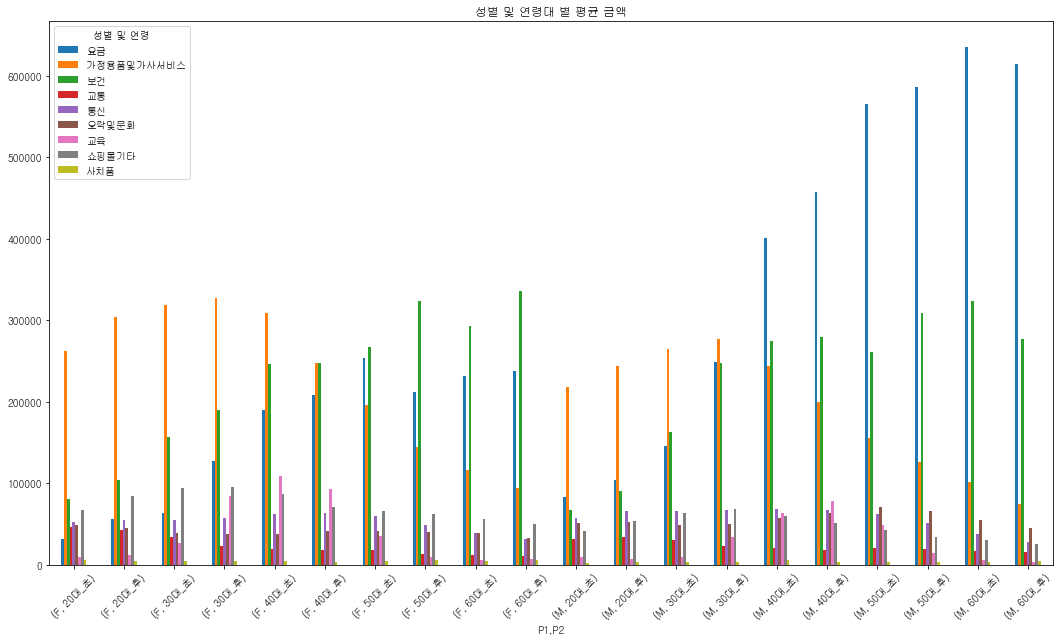

In [59]:
a1_mean.plot.bar(rot=0, figsize = (18,10))
plt.title("성별 및 연령대 별 평균 금액")
plt.xticks(rotation=45)
plt.show()